In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

symbol = 'MSFT'
path = f'../datasets/US_stocks/{symbol}.csv' 
df = pd.read_csv(path)
df_ = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df_.index = pd.DatetimeIndex(df['Date'])
df_.columns = ['Open', f'High', f'Low', f'Close', f'Volume']
df = df_.dropna()

start = '2015-01-01'
end = '2018-01-01'
df = df.loc[(df.index >= start) & (df.index <= end)]

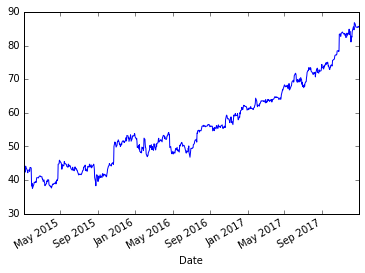

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

df['Close'].plot()

In [24]:
from arch.unitroot import ADF

In [30]:
close = df['Close']
results = ADF(close, lags=30)
print(results)

   Augmented Dickey-Fuller Results   
Test Statistic                  1.109
P-value                         0.995
Lags                               30
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [34]:
results.pvalue

0.995296576255742

# Hurst Exponent

In [6]:
import numpy as np

In [55]:
def hurst(ts):
    lags = range(2, 100)
    sig = [np.std(ts[lag:] - ts[:-lag]) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(sig), 1)
    return poly[0]

In [56]:
hurst(np.log(close.values))

0.29364807400173853

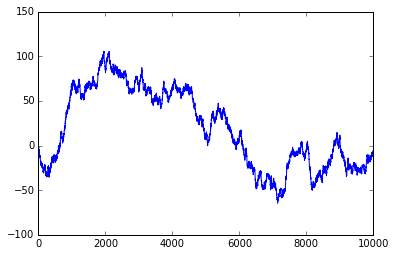

In [57]:
test = np.cumsum(np.random.randn(10000))
plt.plot(test)

In [58]:
hurst(test)

0.5395556993218394

In [101]:
from arch.unitroot import VarianceRatio


vr = VarianceRatio(test[:10000], 10)
print(vr.summary())

     Variance-Ratio Test Results     
Test Statistic                  3.705
P-value                         0.000
Lags                               10
-------------------------------------

Computed with overlapping blocks (de-biased)


In [102]:
vr.pvalue

0.00021117467993003736

In [103]:
vr.critical_values

{'1%': -2.3263478740408408,
 '10%': -1.2815515655446004,
 '5%': -1.6448536269514729,
 '90%': 1.2815515655446004,
 '95%': 1.6448536269514722,
 '99%': 2.3263478740408408}

# Half Life Mean Reversion

In [118]:
from sklearn.linear_model import LinearRegression

def calc_halflife(close):
    diff = close.diff().dropna()
    prev_price = close.shift(1).dropna()
    regr = LinearRegression()
    regr.fit(prev_price.values[:, None], diff.values)
    lam = regr.coef_[0]
    tau = -np.log(2) / lam
    return tau

In [119]:
calc_halflife(close)

-550.3919488340855

In [125]:
calc_halflife(pd.Series(np.random.randn(1000)))

0.6902589927612256

In [126]:
calc_halflife(pd.Series(test))

2720.479868166828

# Johansen Test

* Python Implementation, https://searchcode.com/codesearch/view/88477497/